In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('apple_global_sales_dataset.csv')
df

,sale_id,sale_date,year,quarter,month,country,region,city,product_name,category,...,currency,fx_rate_to_usd,revenue_local_currency,sales_channel,payment_method,customer_segment,customer_age_group,previous_device_os,customer_rating,return_status
0,APPL-00000001,2022-01-03,2022,Q1,January,Argentina,South America,Buenos Aires,AirPods (3rd Gen),AirPods,...,ARS,907.0,1.343448e+05,Third-Party Retailer,Cash,Government,45–54,NaN,4.1,Kept
1,APPL-00000002,2022-01-04,2022,Q1,January,Argentina,South America,Buenos Aires,USB-C Woven Charge Cable,Accessories,...,ARS,907.0,1.155971e+05,Authorized Reseller,Debit Card,Business,45–54,NaN,4.8,Kept
2,APPL-00000003,2022-05-18,2022,Q2,May,Argentina,South America,Buenos Aires,Apple Watch Series 8,Apple Watch,...,ARS,907.0,1.066342e+06,Corporate / B2B,Credit Card,Individual,18–24,NaN,4.3,Kept
3,APPL-00000004,2022-05-23,2022,Q2,May,Argentina,South America,Buenos Aires,MacBook Pro 14-inch (M3),Mac,...,ARS,907.0,3.506045e+06,Carrier Store,Credit Card,Education,45–54,NaN,NaN,Kept
4,APPL-00000005,2022-07-13,2022,Q3,July,Argentina,South America,Buenos Aires,Apple Watch Ultra 2,Apple Watch,...,ARS,907.0,1.952780e+06,Apple Store,Net Banking,Education,18–24,NaN,NaN,Kept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,APPL-00011496,2024-02-08,2024,Q1,February,Vietnam,Asia,Nha Trang,Apple Watch Series 9,Apple Watch,...,VND,24500.0,1.957550e+07,Third-Party Retailer,Gift Card,Individual,18–24,NaN,4.0,Kept
11496,APPL-00011497,2024-02-15,2024,Q1,February,Vietnam,Asia,Nha Trang,Mac Pro (M2 Ultra),Mac,...,VND,24500.0,1.663898e+08,Corporate / B2B,Gift Card,Education,45–54,NaN,4.9,Kept
11497,APPL-00011498,2024-08-28,2024,Q3,August,Vietnam,Asia,Nha Trang,iPhone 15,iPhone,...,VND,24500.0,8.657932e+07,Authorized Reseller,Debit Card,Government,35–44,iOS 16,3.8,Kept
11498,APPL-00011499,2024-08-31,2024,Q3,August,Vietnam,Asia,Nha Trang,iPhone SE (3rd Gen),iPhone,...,VND,24500.0,1.075526e+07,Apple Store,EMI / Installment,Education,55+,iOS 17,NaN,Kept


In [3]:
df.isna().sum()

sale_id                      0
sale_date                    0
year                         0
quarter                      0
month                        0
country                      0
region                       0
city                         0
product_name                 0
category                     0
storage                   4804
color                        0
unit_price_usd               0
discount_pct                 0
units_sold                   0
discounted_price_usd         0
revenue_usd                  0
currency                     0
fx_rate_to_usd               0
revenue_local_currency       0
sales_channel                0
payment_method               0
customer_segment             0
customer_age_group           0
previous_device_os        8056
customer_rating           3360
return_status                0
dtype: int64

In [4]:
df.head()

,sale_id,sale_date,year,quarter,month,country,region,city,product_name,category,...,currency,fx_rate_to_usd,revenue_local_currency,sales_channel,payment_method,customer_segment,customer_age_group,previous_device_os,customer_rating,return_status
0,APPL-00000001,2022-01-03,2022,Q1,January,Argentina,South America,Buenos Aires,AirPods (3rd Gen),AirPods,...,ARS,907.0,134344.84,Third-Party Retailer,Cash,Government,45–54,NaN,4.1,Kept
1,APPL-00000002,2022-01-04,2022,Q1,January,Argentina,South America,Buenos Aires,USB-C Woven Charge Cable,Accessories,...,ARS,907.0,115597.15,Authorized Reseller,Debit Card,Business,45–54,NaN,4.8,Kept
2,APPL-00000003,2022-05-18,2022,Q2,May,Argentina,South America,Buenos Aires,Apple Watch Series 8,Apple Watch,...,ARS,907.0,1066341.76,Corporate / B2B,Credit Card,Individual,18–24,NaN,4.3,Kept
3,APPL-00000004,2022-05-23,2022,Q2,May,Argentina,South America,Buenos Aires,MacBook Pro 14-inch (M3),Mac,...,ARS,907.0,3506044.78,Carrier Store,Credit Card,Education,45–54,NaN,NaN,Kept
4,APPL-00000005,2022-07-13,2022,Q3,July,Argentina,South America,Buenos Aires,Apple Watch Ultra 2,Apple Watch,...,ARS,907.0,1952780.07,Apple Store,Net Banking,Education,18–24,NaN,NaN,Kept


In [13]:
df.columns

Index(['sale_id', 'sale_date', 'year', 'quarter', 'month', 'country', 'region',
       'city', 'product_name', 'category', 'storage', 'color',
       'unit_price_usd', 'discount_pct', 'units_sold', 'discounted_price_usd',
       'revenue_usd', 'currency', 'fx_rate_to_usd', 'revenue_local_currency',
       'sales_channel', 'payment_method', 'customer_segment',
       'customer_age_group', 'previous_device_os', 'customer_rating',
       'return_status'],
      dtype='object')

In [14]:
df.dtypes

sale_id                    object
sale_date                  object
year                        int64
quarter                    object
month                      object
country                    object
region                     object
city                       object
product_name               object
category                   object
storage                    object
color                      object
unit_price_usd            float64
discount_pct                int64
units_sold                  int64
discounted_price_usd      float64
revenue_usd               float64
currency                   object
fx_rate_to_usd            float64
revenue_local_currency    float64
sales_channel              object
payment_method             object
customer_segment           object
customer_age_group         object
previous_device_os         object
customer_rating           float64
return_status              object
dtype: object

In [15]:
df.groupby('category')['revenue_usd'].sum().sort_values(ascending=False)

category
Mac            8369961.42
iPhone         5734154.34
iPad           1829815.70
Apple Watch     958773.70
AirPods         572773.95
Accessories     570190.14
Name: revenue_usd, dtype: float64

In [16]:
df.groupby('category')['units_sold'].sum().sort_values(ascending=False)

category
iPhone         6908
Accessories    5298
Mac            3789
iPad           2824
Apple Watch    2305
AirPods        2146
Name: units_sold, dtype: int64

In [17]:
df.groupby('category')['unit_price_usd'].mean().sort_values(ascending=False)

category
Mac            2308.201169
iPhone          860.359611
iPad            678.665540
Apple Watch     429.974680
AirPods         275.952342
Accessories     111.120765
Name: unit_price_usd, dtype: float64

In [18]:
df[['discount_pct', 'units_sold']].corr()

,discount_pct,units_sold
discount_pct,1.000000,-0.005998
units_sold,-0.005998,1.000000


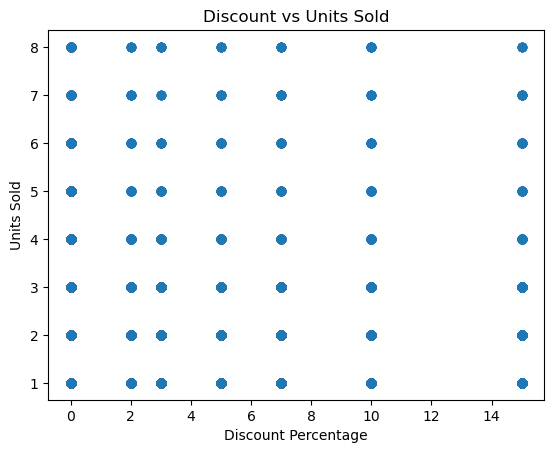

In [19]:
plt.scatter(df['discount_pct'], df['units_sold'])
plt.xlabel("Discount Percentage")
plt.ylabel("Units Sold")
plt.title("Discount vs Units Sold")
plt.show()

In [20]:
df.groupby('country')['revenue_usd'].sum().sort_values(ascending=False).head(10)

country
Hong Kong       485261.23
Netherlands     455560.33
Mexico          454405.84
Canada          451801.06
Turkey          450007.23
Saudi Arabia    444411.63
Germany         444195.10
Japan           440942.04
Malaysia        432614.73
South Korea     429516.44
Name: revenue_usd, dtype: float64

In [21]:
df.groupby('country')['units_sold'].sum().sort_values(ascending=False).head(10)

country
Japan        576
Finland      557
Argentina    552
Mexico       550
Malaysia     547
Canada       537
Poland       535
Turkey       533
Hong Kong    530
Australia    524
Name: units_sold, dtype: int64

In [22]:
df.groupby('country')['revenue_usd'].mean().sort_values(ascending=False).head(10)

country
Hong Kong         1910.477283
India             1897.233365
Turkey            1851.881605
Saudi Arabia      1828.854444
Netherlands       1814.981394
Belgium           1784.571765
Germany           1783.916064
United Kingdom    1724.777322
New Zealand       1724.261653
Canada            1704.909660
Name: revenue_usd, dtype: float64

In [23]:
df['return_status'].value_counts()

return_status
Kept         10143
Returned       898
Exchanged      459
Name: count, dtype: int64

In [24]:
df['return_status'].value_counts(normalize=True) * 100

return_status
Kept         88.200000
Returned      7.808696
Exchanged     3.991304
Name: proportion, dtype: float64

In [25]:
df[df['return_status'] == 'Returned'].groupby('category')['sale_id'].count().sort_values(ascending=False)

category
iPhone         280
Accessories    190
Mac            148
iPad           116
AirPods         87
Apple Watch     77
Name: sale_id, dtype: int64

In [26]:
# Total sales per category
total_sales = df.groupby('category')['sale_id'].count()

# Total returns per category
returns = df[df['return_status'] == 'Returned'].groupby('category')['sale_id'].count()

# Return rate
(return_rate := (returns / total_sales) * 100).sort_values(ascending=False)

category
iPad           8.411893
AirPods        8.184384
iPhone         8.130081
Mac            7.901762
Accessories    7.265774
Apple Watch    6.838366
Name: sale_id, dtype: float64

In [27]:
# Keep only Kept and Returned
df_model = df[df['return_status'].isin(['Kept', 'Returned'])].copy()

# Convert target to 0 and 1
df_model['return_flag'] = df_model['return_status'].map({'Kept': 0, 'Returned': 1})

df_model['return_flag'].value_counts()

return_flag
0    10143
1      898
Name: count, dtype: int64

In [28]:
df_model = df_model[['discount_pct','units_sold','unit_price_usd',
                     'category','customer_rating','return_flag']]

df_model.head()

,discount_pct,units_sold,unit_price_usd,category,customer_rating,return_flag
0,7,1,159.27,AirPods,4.1,0
1,15,5,29.99,Accessories,4.8,0
2,0,4,293.92,Apple Watch,4.3,0
3,0,2,1932.77,Mac,NaN,0
4,5,3,755.44,Apple Watch,NaN,0


In [29]:
df_model['customer_rating'].fillna(df_model['customer_rating'].mean(), inplace=True)
df_model = pd.get_dummies(df_model, columns=['category'], drop_first=True)

C:\Users\aahan\AppData\Local\Temp\ipykernel_19116\3779849226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['customer_rating'].fillna(df_model['customer_rating'].mean(), inplace=True)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_model.drop('return_flag', axis=1)
y = df_model['return_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9203259393390675

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2033
           1       0.00      0.00      0.00       176

    accuracy                           0.92      2209
   macro avg       0.46      0.50      0.48      2209
weighted avg       0.85      0.92      0.88      2209



c:\Users\aahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\aahan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
